# WK7 Data Visualization <hr style="border:2.5px solid #126782"></hr>

Name: **Ely John C. Punzalan** <br>
Course: **CPE2A**

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
df = pd.read_csv(r"..\raw\chip-dataset-cleaned.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       4854 non-null   object 
 1   Type          4854 non-null   object 
 2   Date          4854 non-null   object 
 3   Process_Size  4845 non-null   float64
 4   TDP           4854 non-null   float64
 5   Die_Size      4854 non-null   float64
 6   Transistors   4854 non-null   float64
 7   Frequency     4854 non-null   int64  
 8   Foundry       4854 non-null   object 
 9   Vendor        4854 non-null   object 
 10  FP16          536 non-null    float64
 11  FP32          1948 non-null   float64
 12  FP64          1306 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 493.1+ KB


In [116]:
df = df.drop(df.columns[[10,11,12]],axis=1)
df.head()

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD


# N Chips Manufactured

In [117]:
df_w = df.copy()

In [118]:
chip_count = df_w['Vendor'].value_counts()
chip_count

Vendor
AMD       1662
Intel     1392
NVIDIA    1201
ATI        535
Other       64
Name: count, dtype: int64

In [119]:
type(chip_count)

pandas.core.series.Series

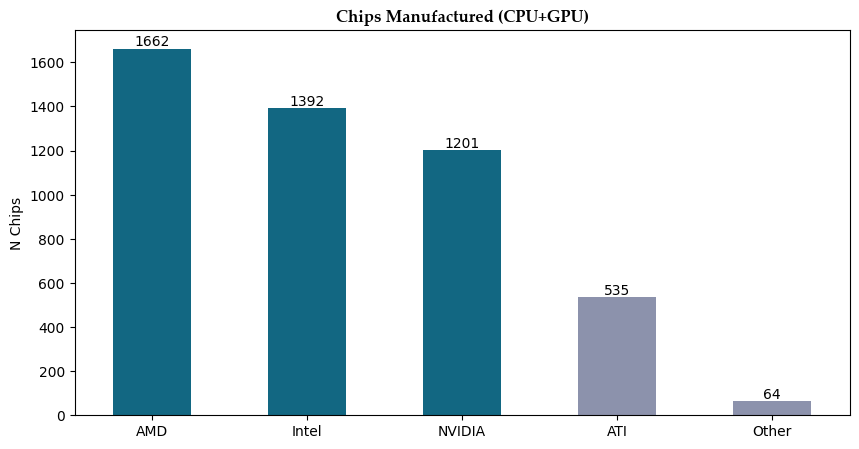

In [120]:
chart = chip_count.plot(kind='bar',
                        color = ['#126782','#126782','#126782','#8C92AC','#8C92AC'],
                        figsize=(10,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Chips Manufactured (CPU+GPU)',
          fontfamily = 'Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.xlabel('')
chart.set_xticklabels(chip_count.index, rotation=0)
plt.ylabel('N Chips')
plt.show()

# N CPU Manufactured

In [121]:
df_cpu = df_w[df_w['Type']=='CPU']
df_cpu

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD
...,...,...,...,...,...,...,...,...,...,...
2187,Intel Xeon Gold 6312U,CPU,4/6/2021,10.0,185.0,188.440445,1929.922279,2400,Intel,Intel
2188,AMD Ryzen 9 4900H,CPU,3/16/2020,7.0,54.0,156.000000,9800.000000,3300,TSMC,AMD
2189,Intel Core 2 Duo E6550,CPU,7/1/2007,65.0,65.0,143.000000,291.000000,2333,Intel,Intel
2190,AMD Opteron 246,CPU,12/1/2004,90.0,85.0,188.440445,106.000000,2000,Unknown,AMD


In [122]:
cpu_count = df_cpu['Vendor'].value_counts()
cpu_count

Vendor
Intel    1242
AMD       950
Name: count, dtype: int64

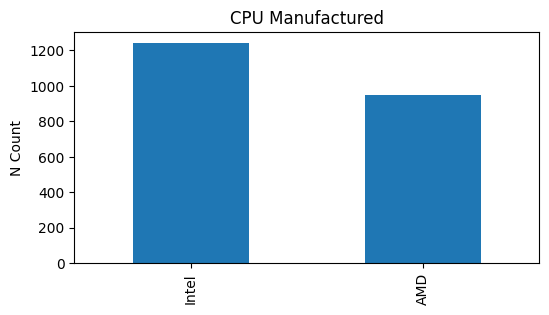

In [123]:
chart = cpu_count.plot(kind='bar',figsize=(6,3))
plt.title('CPU Manufactured')
plt.ylabel('N Count')
plt.xlabel('')
plt.show()

# Lowest TDP (Thermal Design Power)

In [124]:
df_tdp = df_w[['Product','TDP']]
df_tdp

,Product,TDP
0,AMD Athlon 64 3500+,45.000000
1,AMD Athlon 200GE,35.000000
2,Intel Core i5-1145G7,28.000000
3,Intel Xeon E5-2603 v2,80.000000
4,AMD Phenom II X4 980 BE,125.000000
...,...,...
4849,NVIDIA Quadro 3000M,75.000000
4850,Intel GMA 950,7.000000
4851,NVIDIA GeForce GT 320M,23.000000
4852,NVIDIA GeForce FX 5200,81.359981


In [125]:
type(df_tdp)

pandas.core.frame.DataFrame

In [126]:
df_tdp = df_tdp.sort_values(by='TDP', ascending=True)
df_tdp

,Product,TDP
60,Intel Atom Z515,1.0
2175,Intel Atom Z612,1.0
469,Intel Atom Z620,1.0
1550,Intel Atom Z500,1.0
1761,Intel Atom Z610,1.0
...,...,...
4605,NVIDIA Quadro Plex 2100 S4,640.0
2908,NVIDIA Tesla S1075,800.0
4064,NVIDIA Tesla S870,800.0
3603,NVIDIA Tesla S1070,800.0


In [127]:
df_tdp = df_tdp.head(7)
df_tdp

,Product,TDP
60,Intel Atom Z515,1.0
2175,Intel Atom Z612,1.0
469,Intel Atom Z620,1.0
1550,Intel Atom Z500,1.0
1761,Intel Atom Z610,1.0
1964,Intel Atom Z600,1.0
858,Intel Atom Z540,2.0


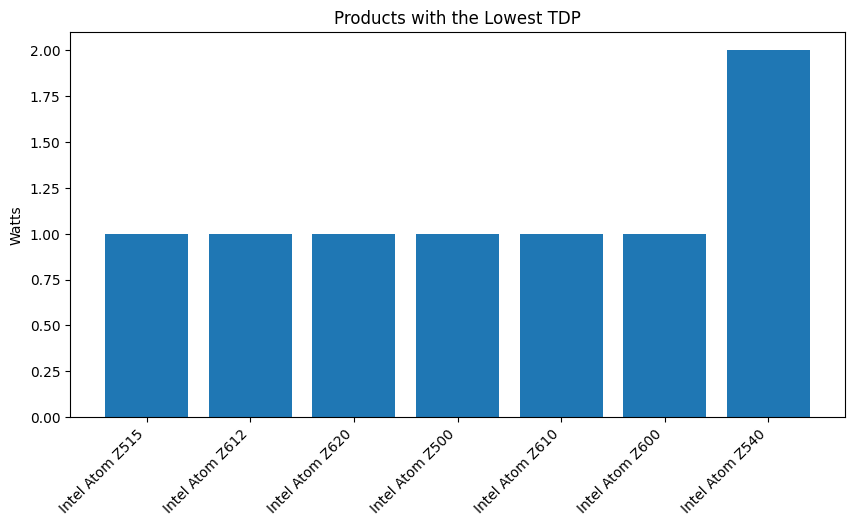

In [128]:
plt.figure(figsize=(10,5))
plt.bar(df_tdp['Product'],df_tdp['TDP'])
plt.title('Products with the Lowest TDP')
plt.ylabel('Watts')
plt.xticks(rotation=45, ha='right')
plt.show()

# GPU Process Size Trend

In [129]:
df_ps = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='GPU').dropna()
df_ps

,Type,Date,Process_Size
2192,GPU,4/3/2011,32.0
2193,GPU,6/25/2002,150.0
2194,GPU,2/23/2019,14.0
2195,GPU,3/2/2008,130.0
2196,GPU,9/30/2008,55.0
...,...,...,...
4849,GPU,2/22/2011,40.0
4850,GPU,6/1/2005,90.0
4851,GPU,3/3/2010,40.0
4852,GPU,3/6/2003,150.0


In [130]:
df_ps['Date'] = pd.to_datetime(df_ps['Date'])
df_ps['Year'] = df_ps['Date'].dt.year
df_ps 

,Type,Date,Process_Size,Year
2192,GPU,2011-04-03,32.0,2011.0
2193,GPU,2002-06-25,150.0,2002.0
2194,GPU,2019-02-23,14.0,2019.0
2195,GPU,2008-03-02,130.0,2008.0
2196,GPU,2008-09-30,55.0,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,40.0,2011.0
4850,GPU,2005-06-01,90.0,2005.0
4851,GPU,2010-03-03,40.0,2010.0
4852,GPU,2003-03-06,150.0,2003.0


In [131]:
df_ps = df_ps.groupby('Year')['Process_Size'].mean().reset_index()
df_ps

,Year,Process_Size
0,2000.0,189.642857
1,2001.0,165.000000
2,2002.0,153.913043
3,2003.0,140.982143
4,2004.0,121.384615
5,2005.0,112.315789
6,2006.0,93.178295
7,2007.0,80.031646
8,2008.0,63.439306
9,2009.0,52.740385


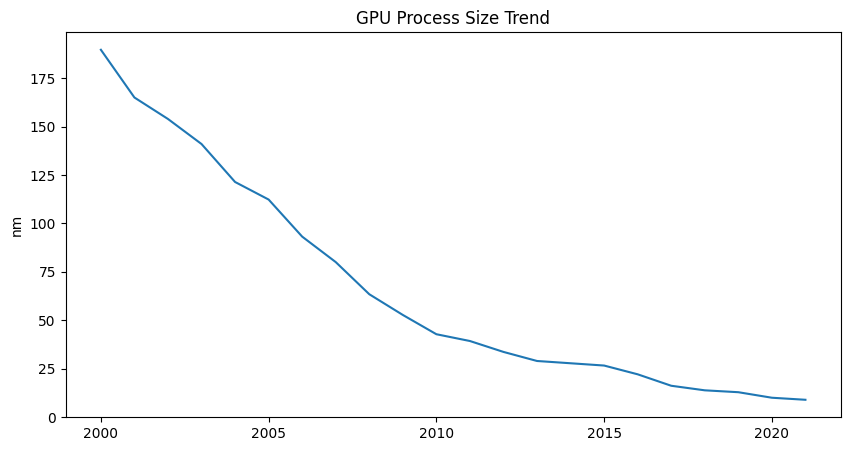

In [132]:
plt.figure(figsize=(10,5))
plt.plot(df_ps['Year'],df_ps['Process_Size'])
plt.title('GPU Process Size Trend')
plt.ylabel('nm')
plt.show()

# Die Size Comparison

## CPU Die Size

In [133]:
df_ds_cpu = df_w[['Type','Date','Die_Size']].where(df_w['Type']=='CPU').dropna()
df_ds_cpu

,Type,Date,Die_Size
0,CPU,2/20/2007,77.000000
1,CPU,9/6/2018,192.000000
2,CPU,9/2/2020,188.440445
3,CPU,9/1/2013,160.000000
4,CPU,5/3/2011,258.000000
...,...,...,...
2187,CPU,4/6/2021,188.440445
2188,CPU,3/16/2020,156.000000
2189,CPU,7/1/2007,143.000000
2190,CPU,12/1/2004,188.440445


In [134]:
df_ds_cpu['Date'] = pd.to_datetime(df_ds_cpu['Date'])
df_ds_cpu['Year'] = df_ds_cpu['Date'].dt.year
df_ds_cpu

,Type,Date,Die_Size,Year
0,CPU,2007-02-20,77.000000,2007.0
1,CPU,2018-09-06,192.000000,2018.0
2,CPU,2020-09-02,188.440445,2020.0
3,CPU,2013-09-01,160.000000,2013.0
4,CPU,2011-05-03,258.000000,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,188.440445,2021.0
2188,CPU,2020-03-16,156.000000,2020.0
2189,CPU,2007-07-01,143.000000,2007.0
2190,CPU,2004-12-01,188.440445,2004.0


In [135]:
df_ds_cpu = df_ds_cpu.groupby('Year')['Die_Size'].mean().reset_index()
df_ds_cpu

,Year,Die_Size
0,2000.0,129.058824
1,2001.0,124.872093
2,2002.0,130.641026
3,2003.0,168.835123
4,2004.0,148.858889
5,2005.0,155.710329
6,2006.0,172.474156
7,2007.0,134.437713
8,2008.0,163.509349
9,2009.0,185.695652


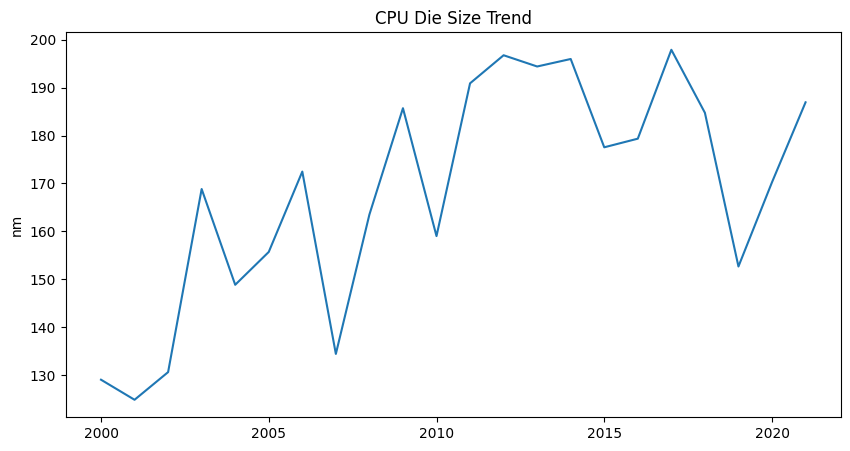

In [143]:
plt.figure(figsize=(10,5))
plt.plot(df_ds_cpu['Year'],df_ds_cpu['Die_Size'])
plt.title('CPU Die Size Trend')
plt.ylabel('nm')
plt.show()

## GPU Die Size

In [144]:
df_ds_gpu = df_w[['Type','Date','Die_Size']].where(df_w['Type']=='GPU').dropna()
df_ds_gpu

,Type,Date,Die_Size
2192,GPU,4/3/2011,216.000000
2193,GPU,6/25/2002,174.000000
2194,GPU,2/23/2019,132.000000
2195,GPU,3/2/2008,188.440445
2196,GPU,9/30/2008,73.000000
...,...,...,...
4849,GPU,2/22/2011,332.000000
4850,GPU,6/1/2005,188.440445
4851,GPU,3/3/2010,100.000000
4852,GPU,3/6/2003,65.000000


In [145]:
df_ds_gpu['Date'] = pd.to_datetime(df_ds_gpu['Date'])
df_ds_gpu['Year'] = df_ds_gpu['Date'].dt.year
df_ds_gpu

,Type,Date,Die_Size,Year
2192,GPU,2011-04-03,216.000000,2011.0
2193,GPU,2002-06-25,174.000000,2002.0
2194,GPU,2019-02-23,132.000000,2019.0
2195,GPU,2008-03-02,188.440445,2008.0
2196,GPU,2008-09-30,73.000000,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,332.000000,2011.0
4850,GPU,2005-06-01,188.440445,2005.0
4851,GPU,2010-03-03,100.000000,2010.0
4852,GPU,2003-03-06,65.000000,2003.0


In [146]:
df_ds_gpu = df_ds_gpu.groupby('Year')['Die_Size'].mean().reset_index()
df_ds_gpu

,Year,Die_Size
0,2000.0,106.848015
1,2001.0,111.924925
2,2002.0,114.646995
3,2003.0,138.633286
4,2004.0,176.308971
5,2005.0,188.639598
6,2006.0,175.216775
7,2007.0,174.506855
8,2008.0,197.312619
9,2009.0,176.377358


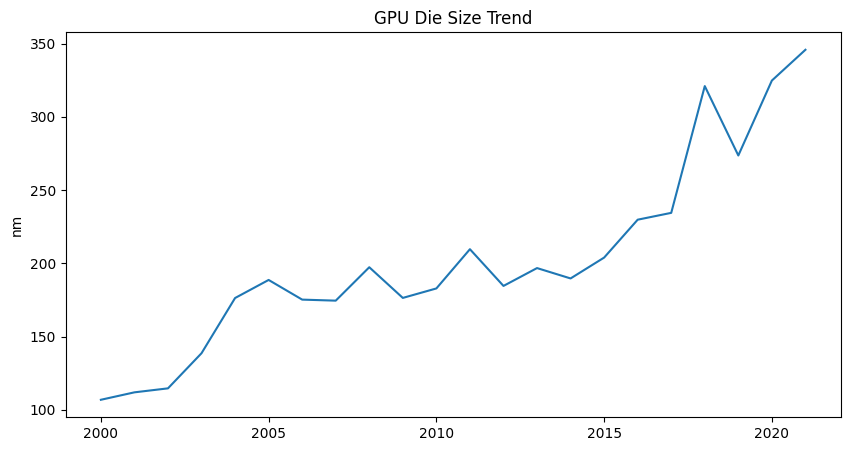

In [147]:
plt.figure(figsize=(10,5))
plt.plot(df_ds_gpu['Year'],df_ds_gpu['Die_Size'])
plt.title('GPU Die Size Trend')
plt.ylabel('nm')
plt.show()

# Transistors

# Frequency

# Foundry

# Vendor

# Conclusion

With the visualization of the GPU Process Size and historical trend, we can infer that the GPU Process Size reduces as time progresses. This proves the postulate of Moore's Law which states that the number of transistors in a dense integrated circuit doubles roughly every two years, fostering exponential growth in CPU and GPU capabilities. Another postulate called Huang's Law also supports this visualization. Huang's Law states that the performance of GPUs will more than double every two years.